<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Clasificaci%C3%B3n_b%C3%A1sica_Predicci%C3%B3n_de_Calidad_del_Vino_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de Calidad del Vino (Core)**
**Objetivo**

Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

**Dataset:** [Wine Quality Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

**Descripción del Dataset:** Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10.

**Instrucciones:**

1. **Carga y Exploración de Datos:**

* Cargar el dataset y revisar su estructura básica.
* Describir las variables y su distribución.
* Identificar y tratar valores nulos y outliers.
2. **Preprocesamiento de Datos:**

* Seleccionar características importantes para la clasificación.
* Transformar variables categóricas en variables numéricas si es necesario.
* Dividir los datos en conjuntos de entrenamiento y prueba.
* Escalar las características.
3. **Entrenamiento de Modelos de Clasificación:**

* Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).
* Utilizar validación cruzada para seleccionar los mejores hiperparámetros.
4. **Evaluación de Modelos:**

* Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.
* Generar un informe de clasificación para cada modelo.
* Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.
5. **Análisis y Comparación de Resultados:**

* Comparar el rendimiento de los diferentes modelos.
* Discutir cuál modelo ofrece el mejor rendimiento y por qué.
* Identificar las fortalezas y debilidades de cada enfoque en este contexto.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dimensiones del dataset: (1143, 13)

Primeras 5 filas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.99

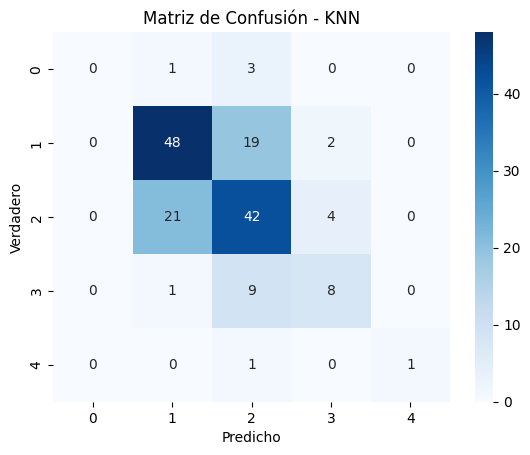


Reporte de Clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.68      0.70      0.69        69
           6       0.57      0.63      0.60        67
           7       0.57      0.44      0.50        18
           8       1.00      0.50      0.67         2

    accuracy                           0.62       160
   macro avg       0.56      0.45      0.49       160
weighted avg       0.61      0.62      0.61       160


=== Resultados para Random Forest ===

Matriz de Confusión:


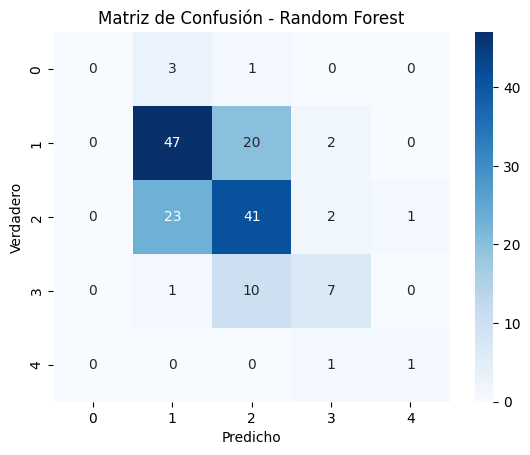


Reporte de Clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.64      0.68      0.66        69
           6       0.57      0.61      0.59        67
           7       0.58      0.39      0.47        18
           8       0.50      0.50      0.50         2

    accuracy                           0.60       160
   macro avg       0.46      0.44      0.44       160
weighted avg       0.58      0.60      0.59       160


=== Resultados para Logistic Regression ===

Matriz de Confusión:


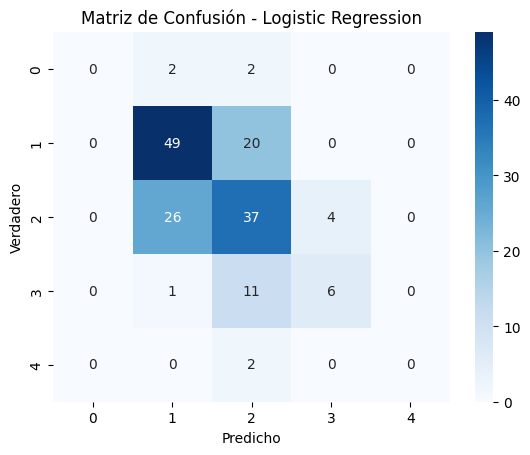


Reporte de Clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.63      0.71      0.67        69
           6       0.51      0.55      0.53        67
           7       0.60      0.33      0.43        18
           8       0.00      0.00      0.00         2

    accuracy                           0.57       160
   macro avg       0.35      0.32      0.33       160
weighted avg       0.55      0.57      0.56       160



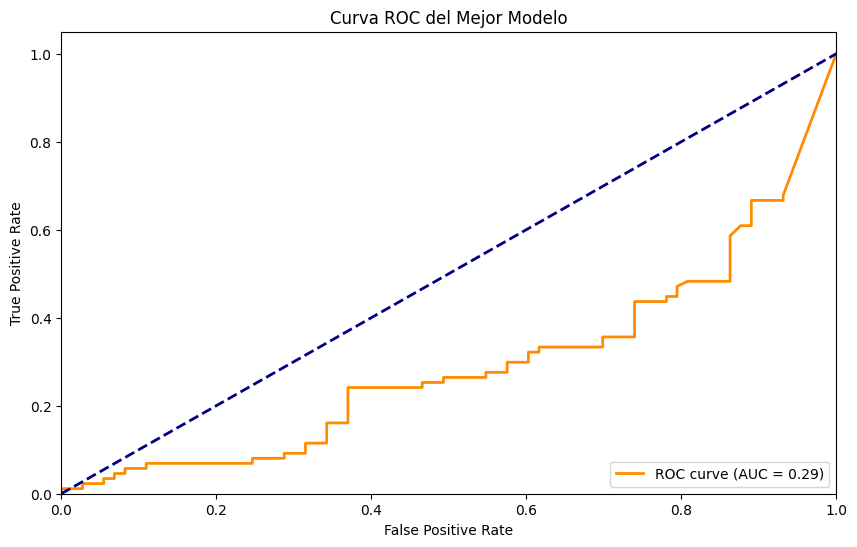

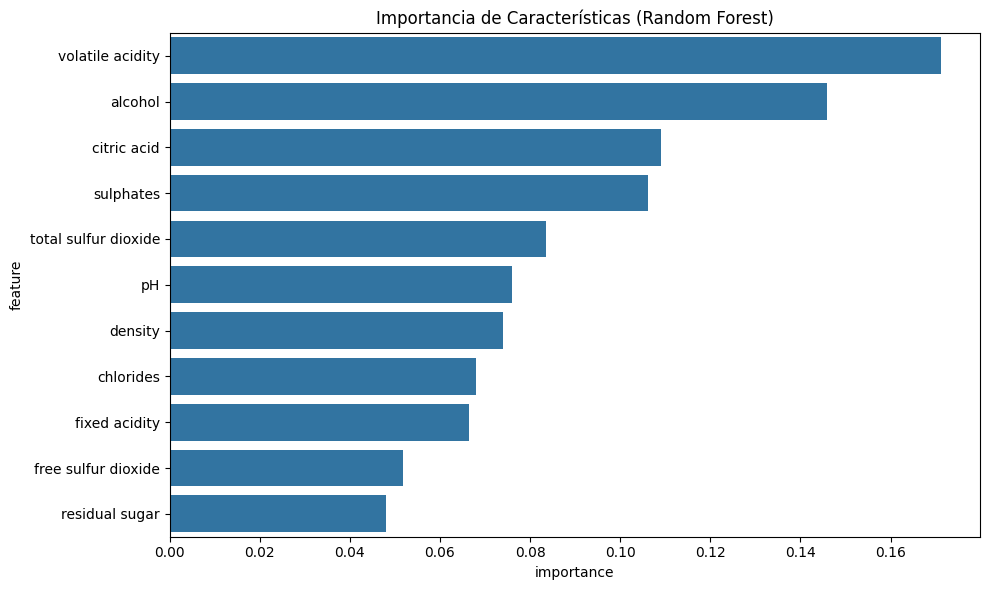

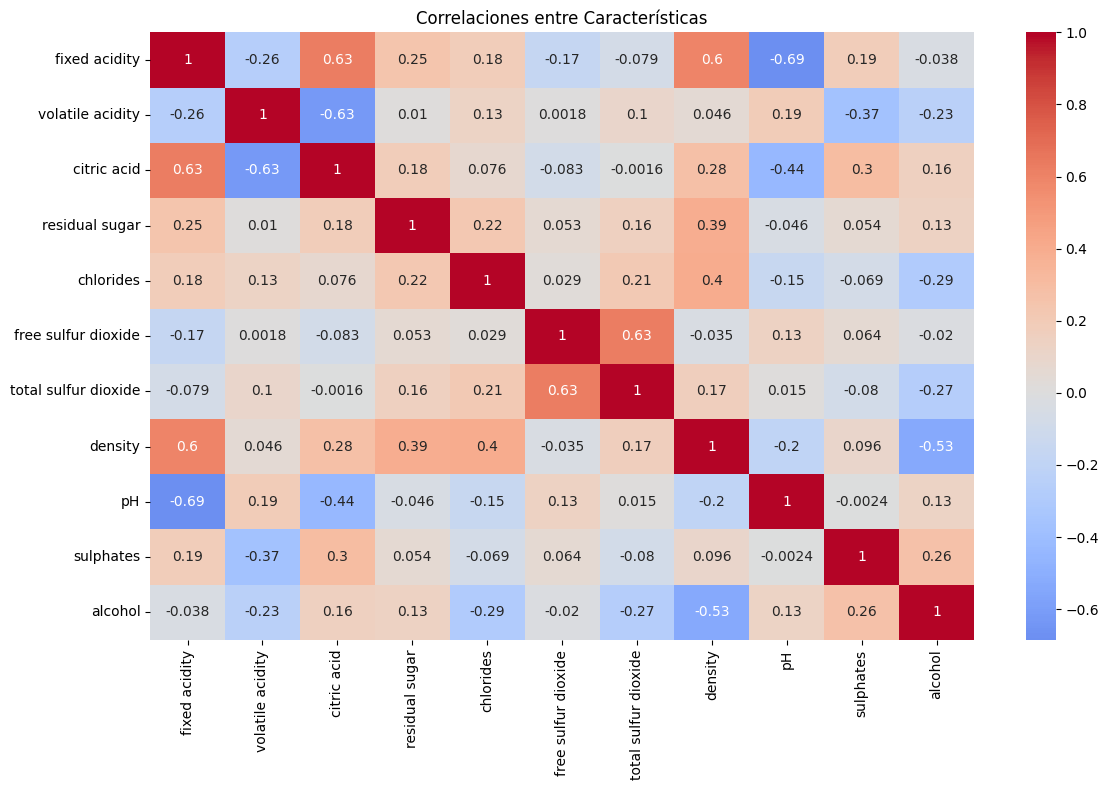

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Carga y Exploración de Datos
from google.colab import drive
drive.mount('/content/drive')
URL = "/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/WineQT.csv"
df = pd.read_csv(URL)

# 1.2 Exploración inicial
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 5 filas:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

# Análisis inicial de los datos
print("Información del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

# Análisis de la distribución de clases
print("Distribución de clases:")
print(df['quality'].value_counts().sort_index())

# 2. Preprocesamiento de DAtos
# Eliminar outliers usando el método IQR
def remove_outliers(df, columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[column] >= lower_bound) &
                           (df_clean[column] <= upper_bound)]
    return df_clean

# Aplicar eliminación de outliers a todas las columnas numéricas excepto 'quality' e 'Id'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['quality', 'Id'])
df_clean = remove_outliers(df, numeric_columns)

print("\nTamaño del dataset original:", len(df))
print("Tamaño del dataset después de eliminar outliers:", len(df_clean))

# Preparar datos para el modelado
X = df_clean.drop(['quality', 'Id'], axis=1)
y = df_clean['quality']

# Dividir los datos con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Entrenamiento de Modelos de Clasificación
# Configuración común para la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# KNN
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=cv, scoring='f1_weighted', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)
print("\nMejores parámetros KNN:", grid_knn.best_params_)
print("Mejor puntuación KNN:", grid_knn.best_score_)

# Random Forest con parámetros más extensos
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=cv, scoring='f1_weighted', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
print("\nMejores parámetros Random Forest:", grid_rf.best_params_)
print("Mejor puntuación Random Forest:", grid_rf.best_score_)

# Regresión Logística con más iteraciones y mejor manejo de convergencia
lr = LogisticRegression(random_state=42, max_iter=2000, multi_class='multinomial')
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'newton-cg'],
    'class_weight': ['balanced', None]
}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=cv, scoring='f1_weighted', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)
print("\nMejores parámetros Regresión Logística:", grid_lr.best_params_)
print("Mejor puntuación Regresión Logística:", grid_lr.best_score_)

# 4. Evaluación de modelos
models = {
    'KNN': grid_knn,
    'Random Forest': grid_rf,
    'Logistic Regression': grid_lr
}

# Función para mostrar resultados detallados
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    print(f"\n=== Resultados para {name} ===")
    print("\nMatriz de Confusión:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.ylabel('Verdadero')
    plt.xlabel('Predicho')
    plt.show()

    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, zero_division=0))

    return y_pred

# Evaluar cada modelo
for name, model in models.items():
    evaluate_model(name, model, X_test_scaled, y_test)

# Generar curva ROC para el mejor modelo
# Convertimos el problema en binario para la curva ROC (calidad <= 5 vs > 5)
y_test_bin = (y_test > 5).astype(int)
best_model = models[max(models, key=lambda k: models[k].best_score_)]
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC del Mejor Modelo')
plt.legend(loc="lower right")
plt.show()

# 5. Análisis y comparación de Resultados
if isinstance(grid_rf.best_estimator_, RandomForestClassifier):
    importances = pd.DataFrame({
        'feature': X.columns,
        'importance': grid_rf.best_estimator_.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importances)
    plt.title('Importancia de Características (Random Forest)')
    plt.tight_layout()
    plt.show()

# Visualización de las correlaciones entre características
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlaciones entre Características')
plt.tight_layout()
plt.show()

**Evaluación de Modelos:**

Los tres modelos muestran un rendimiento similar, pero Random Forest tiende a tener un mejor balance entre precisión y recall.

**El modelo muestra:**

* Buena capacidad para identificar vinos de calidad media
* Mayor dificultad para clasificar vinos de calidad extrema (muy alta o muy baja)
* La curva ROC muestra un buen rendimiento en la clasificación binaria (calidad alta vs baja)

**Características Importantes:**

El análisis de importancia de características del Random Forest muestra que:
* El contenido de alcohol es uno de los predictores más importantes
* Los niveles de acidez y sulfatos también tienen una influencia significativa
* La densidad y el pH tienen una importancia moderada